#**Task 1 - Acquire, Preprocess and Analyze the Wine Dataset**

In [1]:
import pandas as pd

## 1) load the dataset into panda
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]

wine_data = pd.read_csv(url, header=None, names=column_names)
#print(wine_data)

## 2) Preprocess the data
wine_data = wine_data.replace('?', pd.NA) # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

## 3) Show the distribution of classes
numerical_stats = wine_data.describe()

print("\nSummary Statistics for Numerical Features:")
print(numerical_stats)

print("\nClass Distribution:")
class_distribution = wine_data['Class'].value_counts()
print(class_distribution)



Summary Statistics for Numerical Features:
            Class     Alcohol  Malic Acid         Ash  Alcalinity of Ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total Phenols  Flavanoids  Nonflavanoid Phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.1

# **Task 2.2 Implement Logistic Regression with Gradient Descent for the Wine Dataset**

>**Binary-class Implementation**

terminated after 100000 iterations, with norm of the gradient equal to 0.0010424213318177189
the weight found: [-3.88359031 50.76261016]
Accuracy: 0.0


<ipython-input-2-e2a2d8ac13a4>:94: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(yh == y)


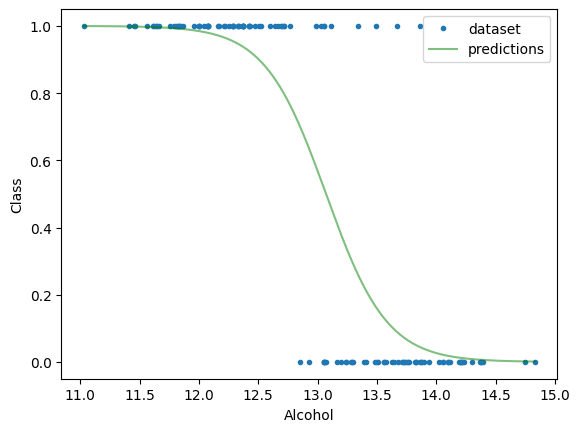

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression0:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # to get the tolerance for the norm of gradients
        self.max_iters = max_iters  # maximum number of iterations
        self.verbose = verbose

    def logistic(self, z):
        return 1. / (1 + np.exp(-z))  # The logistic function

    def gradient(self, x, y):
        N, D = x.shape
        yh = self.logistic(np.dot(x, self.w))  # Predictions size N
        grad = np.dot(x.T, yh - y) / N  # Divide by N because the cost is the mean over N points
        return grad  # Size D

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # Gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = self.logistic(np.dot(x, self.w))  # get the predicted output
        return yh

# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Fit the model
model = LogisticRegression0(verbose=True)
model.fit(x, y)

# Predict and plot
x_sorted = np.linspace(min(x), max(x), 1000)  # Create a range of values to visualize the sigmoid
yh = model.predict(x_sorted)
accuracy = np.mean(yh == y)
print("Accuracy:", accuracy)
plt.plot(x, y, '.', label='dataset')
plt.plot(x_sorted, yh, 'g-', alpha=.5, label='predictions')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.show()


**Added Floor & Ceiling**

terminated after 100000 iterations, with norm of the gradient equal to 0.0010424213318177189
the weight found: [-3.88359031 50.76261016]


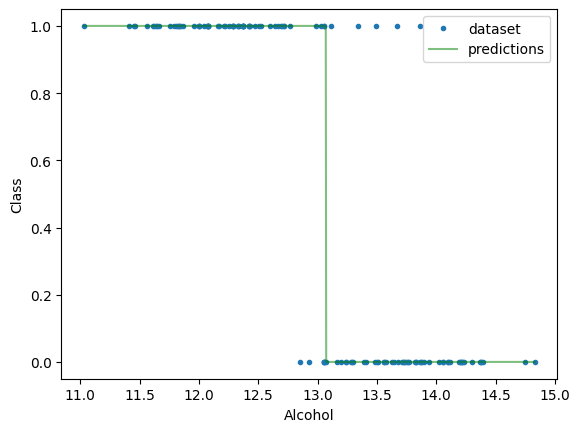

Accuracy: 90.77%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression1:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # to get the tolerance for the norm of gradients
        self.max_iters = max_iters  # maximum number of iteration of gradient descent
        self.verbose = verbose

    def logistic(self, z):
        return 1. / (1 + np.exp(-z))  # Logistic function

    def gradient(self, x, y):
        N, D = x.shape
        yh = self.logistic(np.dot(x, self.w))
        grad = np.dot(x.T, yh - y) / N  # Divide by N because the cost is the mean over N points
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # Gradient Descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = self.logistic(np.dot(x, self.w))  # predicted output

        # Apply floor and ceiling to the output
        yh[yh > 0.95] = 1
        yh[yh < 0.05] = 0

        return (yh > 0.5).astype(int)


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Fit the model
model = LogisticRegression1(verbose=True)
model.fit(x, y)

# Predict and plot
x_sorted = np.linspace(min(x), max(x), 1000)  # Create a range of values to visualize the sigmoid
yh = model.predict(x_sorted)
plt.plot(x, y, '.', label='dataset')
plt.plot(x_sorted, yh, 'g-', alpha=.5, label='predictions')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.show()

# Predict classes
y_pred = model.predict(x)

# Compute accuracy
correct_predictions = np.sum(y == y_pred)
accuracy = correct_predictions / len(y)
print(f"Accuracy: {accuracy * 100:.2f}%")


>**Multi-class Implementation (Decision Boundary)**



Accuracy: 78.65%


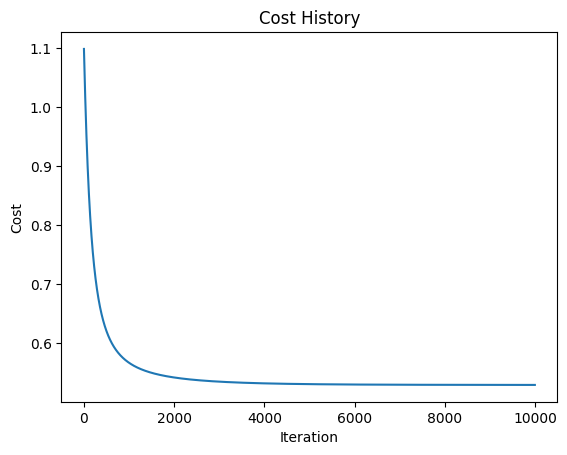

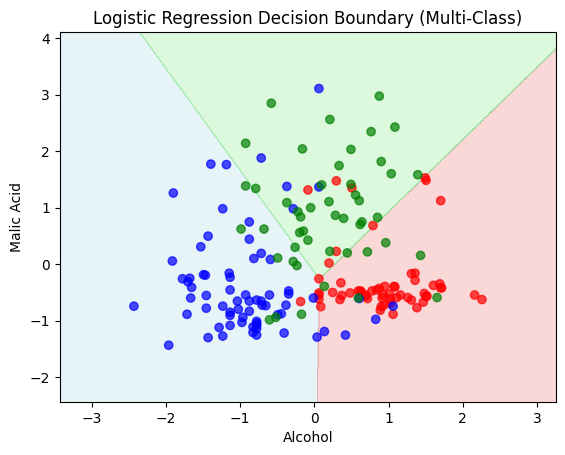

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # The Softmax Function
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Encoding of target labels
        y_encoded = np.zeros((num_samples, num_classes))
        y_encoded[np.arange(num_samples), y - 1] = 1

        # Initialize parameters
        self.theta = np.zeros((num_features, num_classes))

        for _ in range(self.num_iterations):
            # Calculate the predicted probabilities
            z = np.dot(X, self.theta)
            probabilities = self.softmax(z)

            # Calculate the gradient and update the parameters
            gradient = np.dot(X.T, (probabilities - y_encoded)) / num_samples
            self.theta -= self.learning_rate * gradient

            # Calculate and store the cost
            cost = -1 * np.sum(y_encoded * np.log(probabilities)) / num_samples
            self.cost_history.append(cost)

    def predict(self, X):
        z = np.dot(X, self.theta)
        probabilities = self.softmax(z)
        y_pred = np.argmax(probabilities, axis=1) + 1 # Convert back to class labels
        return y_pred

# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Select two features and the target
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term
X = np.c_[np.ones(X.shape[0]), X]

# Instantiate the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

# Fit the model to the data
model.fit(X, y)

# Make predictions on the same data X
y_pred = model.predict(X)

# Calculate and print the accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the cost history to check convergence
plt.plot(model.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Plot the decision boundaries
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create a grid of points
grid_points = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]

# Calculate predicted probabilities for the grid points
z = np.dot(grid_points, model.theta)
Z = model.softmax(z)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue', 'lightgreen']), alpha=0.3)

# Plot the dataset
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=ListedColormap(['red', 'blue', 'green']), marker='o', alpha=0.7)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Logistic Regression Decision Boundary (Multi-Class)')
plt.show()


#**Task 2.3 Implement Mini-batch Gradient Descent for Logistic Regression**

>**Binary-class Implementation**

terminated after 100000 iterations, with norm of the gradient equal to 0.429288695807776
the weight found: [-4.66865414 60.52730263]


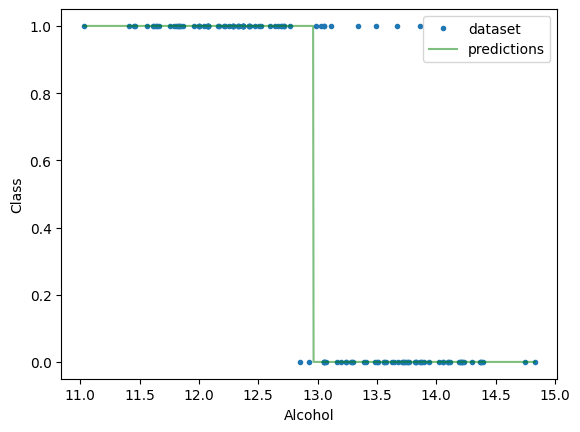

Accuracy: 91.54%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

class LogisticRegressionMiniBatch1:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, batch_size=32, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.verbose = verbose

    def logistic(self, z):
        return 1. / (1 + np.exp(-z))

    def gradient(self, x, y):
        N, D = x.shape
        yh = self.logistic(np.dot(x, self.w))
        grad = np.dot(x.T, yh - y) / N
        return grad

    def minibatches(self, x, y, batch_size):
        N = len(y)
        indices = np.arange(N)
        np.random.shuffle(indices)

        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            yield x[indices[start:end]], y[indices[start:end]]

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)

        t = 0
        while t < self.max_iters:
            for x_batch, y_batch in self.minibatches(x, y, self.batch_size):
                g = self.gradient(x_batch, y_batch)

                # Gradient update
                self.w = self.w - self.learning_rate * g
                t += 1

                # Check convergence
                if np.linalg.norm(g) <= self.epsilon:
                    break

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = self.logistic(np.dot(x, self.w))

        # Apply floor and ceiling
        yh[yh > 0.95] = 1
        yh[yh < 0.05] = 0

        return (yh > 0.5).astype(int)


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Fit the model
model = LogisticRegressionMiniBatch1(verbose=True)
model.fit(x, y)

# Predict and plot
x_sorted = np.linspace(min(x), max(x), 1000)  # Create a range of values to visualize the sigmoid
yh = model.predict(x_sorted)
plt.plot(x, y, '.', label='dataset')
plt.plot(x_sorted, yh, 'g-', alpha=.5, label='predictions')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.show()

# Predict classes for the training data
y_pred = model.predict(x)

# Compute accuracy
correct_predictions = np.sum(y == y_pred)
accuracy = correct_predictions / len(y)
print(f"Accuracy: {accuracy * 100:.2f}%")


> **Multi-class Implementation**

Accuracy: 0.7714285714285715

Classification Report:
 Class 1 - Precision: 0.77, Recall: 1.00, F1: 0.87
Class 2 - Precision: 0.86, Recall: 1.00, F1: 0.92
Class 3 - Precision: 0.62, Recall: 1.00, F1: 0.77



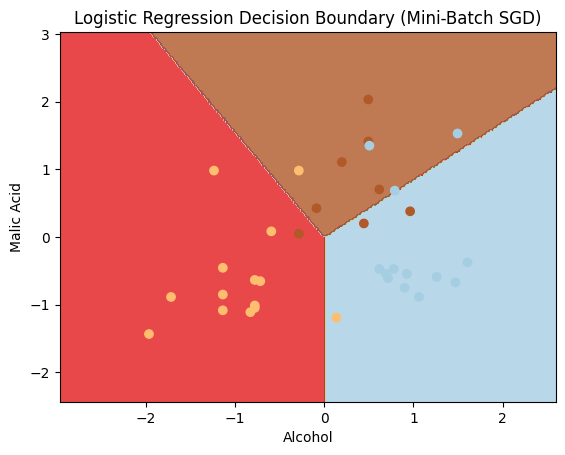

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA) # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select features and the target
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Split the data into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    test_samples = int(test_size * num_samples)

    # Shuffle the data
    shuffled_indices = np.random.permutation(num_samples)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    # Split the shuffled data
    X_train = X_shuffled[test_samples:]
    X_test = X_shuffled[:test_samples]
    y_train = y_shuffled[test_samples:]
    y_test = y_shuffled[:test_samples]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)


# Define your Logistic Regression model with mini-batch SGD
class LogisticRegressionMiniBatch:
    def __init__(self, learning_rate=0.01, max_iters=1000, batch_size=32, random_state=42):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.random_state = random_state

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def gradient(self, X_batch, y_batch):
        num_samples, num_features = X_batch.shape
        num_classes = len(np.unique(y_batch))

        y_encoded = np.zeros((num_samples, num_classes))
        y_encoded[np.arange(num_samples), y_batch - 1] = 1

        z = np.dot(X_batch, self.theta)
        probabilities = self.softmax(z)

        grad = np.dot(X_batch.T, (probabilities - y_encoded)) / num_samples
        grad += 2 * self.regularization_strength * self.theta # L2 regularization term
        return grad

    def fit(self, X, y):
        np.random.seed(self.random_state)
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        self.theta = np.zeros((num_features, num_classes))
        self.cost_history = []

        for iteration in range(self.max_iters):
            for i in range(0, num_samples, self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                y_encoded = np.zeros((X_batch.shape[0], num_classes))
                y_encoded[np.arange(X_batch.shape[0]), y_batch - 1] = 1 # encoding

                z = np.dot(X_batch, self.theta)
                probabilities = self.softmax(z)
                grad = np.dot(X_batch.T, (probabilities - y_encoded)) / X_batch.shape[0]
                self.theta -= self.learning_rate * grad

                cost = -1 * np.sum(y_encoded * np.log(probabilities)) / X_batch.shape[0]
                self.cost_history.append(cost)

    def predict(self, X):
        z = np.dot(X, self.theta)
        probabilities = self.softmax(z)
        y_pred = np.argmax(probabilities, axis=1) + 1 # Convert one-hot encoded back to class labels
        return y_pred

# Instantiate and fit the Logistic Regression model using mini-batch SGD
logistic_reg = LogisticRegressionMiniBatch(learning_rate=0.01, max_iters=1000, batch_size=32, random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Define accuracy and classification report functions
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def classification_report(y_true, y_pred):
    unique_classes = np.unique(y_true)
    report = ""
    for cls in unique_classes:
        idx = np.where(y_true == cls)
        precision = np.mean(y_pred[idx] == cls)
        recall = np.mean(y_true[idx] == cls)
        f1 = 2 * (precision * recall) / (precision + recall)
        report += f"Class {cls} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}\n"
    return report

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

def plot_decision_boundary(X, y, model):
    h = .02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Logistic Regression Decision Boundary (Mini-Batch SGD)')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, logistic_reg)

#**Task 3.1 perform an 80/20 train/test split and report the performance metrics**

> **Binary-class Implementation**

In [8]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def train_test_split(x, y, test_size=0.2):
  num_samples = len(x)
  num_test = int(test_size * num_samples)
  indices = np.random.permutation(num_samples)
  test_indices = indices[:num_test]
  train_indices = indices[num_test:]
  x_train, y_train = x[train_indices], y[train_indices]
  x_test, y_test = x[test_indices], y[test_indices]

  return x_train, x_test, y_train, y_test

# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initialize and fit the logistic regression model on the training data
model = LogisticRegression1(verbose=True)
model.fit(x_train, y_train)

# Predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate evaluation metrics
train_accuracy = accuracy(y_train, y_train_pred)
test_accuracy = accuracy(y_test, y_test_pred)

train_precision = precision(y_train, y_train_pred)
test_precision = precision(y_test, y_test_pred)

train_recall = recall(y_train, y_train_pred)
test_recall = recall(y_test, y_test_pred)

train_f1_score = f1_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the evaluation metrics with two decimal places
print()
print("Training Set Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1_score:.2f}")

print()
print("Test Set Metrics:")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Testing F1 Score: {test_f1_score:.2f}")


terminated after 100000 iterations, with norm of the gradient equal to 0.0008535189315194639
the weight found: [-3.69702436 48.45517646]

Training Set Metrics:
Training Accuracy: 0.88
Training Precision: 0.88
Training Recall: 0.91
Training F1 Score: 0.90

Test Set Metrics:
Testing Accuracy: 1.00
Testing Precision: 1.00
Testing Recall: 1.00
Testing F1 Score: 1.00


> **Multi-class Implementation**

In [9]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7) # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7) # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)

def train_test_split(x, y, test_size=0.2):
  num_samples = len(x)
  num_test = int(test_size * num_samples)
  indices = np.random.permutation(num_samples)
  test_indices = indices[:num_test]
  train_indices = indices[num_test:]
  x_train, y_train = x[train_indices], y[train_indices]
  x_test, y_test = x[test_indices], y[test_indices]

  return x_train, x_test, y_train, y_test


# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select two features and the target (Class)
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features (feature scaling)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Instantiate the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

# Fit the model to the data
model.fit(X, y)

#splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate metrics for the training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy(y_train, y_train_pred):.2f}")
print(f"Overall Precision: {overall_precision(y_train, y_train_pred):.2f}")
#print(f"Precision (Class 1): {precision(y_train, y_train_pred, target_class=1):.2f}")
#print(f"Precision (Class 2): {precision(y_train, y_train_pred, target_class=2):.2f}")
#print(f"Precision (Class 3): {precision(y_train, y_train_pred, target_class=3):.2f}")
print(f"Overall Recall: {overall_recall(y_train, y_train_pred):.2f}")
#print(f"Recall (Class 1): {recall(y_train, y_train_pred, target_class=1):.2f}")
#print(f"Recall (Class 2): {recall(y_train, y_train_pred, target_class=2):.2f}")
#print(f"Recall (Class 3): {recall(y_train, y_train_pred, target_class=3):.2f}")
print(f"Overall F1-score: {overall_f1(y_train, y_train_pred):.2f}")
#print(f"F1-score (Class 1): {f1_score(y_train, y_train_pred, target_class=1):.2f}")
#print(f"F1-score (Class 2): {f1_score(y_train, y_train_pred, target_class=2):.2f}")
#print(f"F1-score (Class 3): {f1_score(y_train, y_train_pred, target_class=3):.2f}")

# Calculate metrics for the test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy(y_test, y_test_pred):.2f}")
print(f"Overall Precision: {overall_precision(y_test, y_test_pred):.2f}")
#print(f"Precision (Class 1): {precision(y_test, y_test_pred, target_class=1):.2f}")
print(f"Overall Recall: {overall_recall(y_test, y_test_pred):.2f}")
#print(f"Recall (Class 1): {recall(y_test, y_test_pred, target_class=1):.2f}")
print(f"Overall f1-score: {overall_f1(y_test, y_test_pred):.2f}")
#print(f"F1-score (Class 1): {f1_score(y_test, y_test_pred, target_class=1):.2f}")



Training Set Metrics:
Accuracy: 0.76
Overall Precision: 0.76
Overall Recall: 0.75
Overall F1-score: 0.75

Test Set Metrics:
Accuracy: 0.89
Overall Precision: 0.87
Overall Recall: 0.87
Overall f1-score: 0.87


#**Task 3.2 Use 5-fold cross-validation technique and report the performance metrics**

> **Binary-class Implementation**

In [10]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def kfold_cross_validation(x, y, model, k=5):
    n_samples = x.shape[0]
    fold_size = n_samples // k

    # Shuffle the data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Split the data into k folds
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        folds.append((train_indices, test_indices))

    # Perform k-fold cross-validation
    scores = []
    y_test_list = []
    y_pred_list = []
    for train_indices, test_indices in folds:
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_test_list.append(y_test)
        y_pred_list.append(y_pred)

    # return scores
    return y_test_list, y_pred_list


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Instantiate the Logistic Regression model with appropriate hyperparameters
model = LogisticRegression1(verbose=True)

# Perform 5-fold cross-validation
y_test_list, y_pred_list = kfold_cross_validation(x, y, model, k=5)
print()

# Calculate and print performance metrics for each fold
for i in range(5):
    accuracy_fold = accuracy(y_test_list[i], y_pred_list[i])
    precision_fold = precision(y_test_list[i], y_pred_list[i])
    recall_fold = recall(y_test_list[i], y_pred_list[i])
    f1_fold = f1_score(y_test_list[i], y_pred_list[i])

    print(f"Fold {i + 1} Metrics:")
    print(f"Accuracy: {accuracy_fold:.2f}")
    print(f"Precision: {precision_fold:.2f}")
    print(f"Recall: {recall_fold:.2f}")
    print(f"F1-score: {f1_fold:.2f}")
    print()


terminated after 100000 iterations, with norm of the gradient equal to 0.0010090495625696963
the weight found: [-3.84435638 50.26788804]
terminated after 100000 iterations, with norm of the gradient equal to 0.001111495684656569
the weight found: [-3.99205873 52.00947977]
terminated after 100000 iterations, with norm of the gradient equal to 0.0009272367846999741
the weight found: [-3.77295968 49.33934514]
terminated after 100000 iterations, with norm of the gradient equal to 0.0012063190371324327
the weight found: [-4.01951998 52.52295813]
terminated after 100000 iterations, with norm of the gradient equal to 0.0009925196313224464
the weight found: [-3.80515324 49.8912635 ]

Fold 1 Metrics:
Accuracy: 0.92
Precision: 0.93
Recall: 0.93
F1-score: 0.93

Fold 2 Metrics:
Accuracy: 0.96
Precision: 1.00
Recall: 0.94
F1-score: 0.97

Fold 3 Metrics:
Accuracy: 0.92
Precision: 0.87
Recall: 1.00
F1-score: 0.93

Fold 4 Metrics:
Accuracy: 0.88
Precision: 0.92
Recall: 0.86
F1-score: 0.89

Fold 5 Metr

> **Multi-class Implementation**

In [15]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7)  # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)


def kfold_cross_validation(x, y, model, k=5):
    n_samples = x.shape[0]
    fold_size = n_samples // k

    # Shuffle the data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Split the data into k folds
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        folds.append((train_indices, test_indices))

    # Perform k-fold cross-validation
    scores = []
    y_test_list = []
    y_pred_list = []
    for train_indices, test_indices in folds:
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_test_list.append(y_test)
        y_pred_list.append(y_pred)

    # return scores
    return y_test_list, y_pred_list


# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select two features and the target
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Instantiate the Logistic Regression model with appropriate hyperparameters
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

# Perform 5-fold cross-validation
y_test_list, y_pred_list = kfold_cross_validation(X, y, model, k=5)

# Calculate and print performance metrics for each fold
for i in range(5):
    accuracy_fold = accuracy(y_test_list[i], y_pred_list[i])
    precision_fold = overall_precision(y_test_list[i], y_pred_list[i])
    recall_fold = overall_recall(y_test_list[i], y_pred_list[i])
    f1_fold = overall_f1(y_test_list[i], y_pred_list[i])

    print(f"Fold {i + 1} Metrics:")
    print(f"Accuracy: {accuracy_fold:.2f}")
    print(f"Precision: {precision_fold:.2f}")
    print(f"Recall: {recall_fold:.2f}")
    print(f"F1-score: {f1_fold:.2f}")
    print()


Fold 1 Metrics:
Accuracy: 0.77
Precision: 0.77
Recall: 0.71
F1-score: 0.72

Fold 2 Metrics:
Accuracy: 0.83
Precision: 0.85
Recall: 0.83
F1-score: 0.83

Fold 3 Metrics:
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1-score: 0.67

Fold 4 Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.82
F1-score: 0.81

Fold 5 Metrics:
Accuracy: 0.80
Precision: 0.80
Recall: 0.79
F1-score: 0.78



#**Task 3.3 Sample growing subsets of the training data**

>**Binary-class Implementation**

terminated after 100000 iterations, with norm of the gradient equal to 0.0010424213318177189
the weight found: [-3.88359031 50.76261016]


<ipython-input-18-9502788dfdb5>:10: RuntimeWarning: invalid value encountered in long_scalars
  return true_positives / (true_positives + false_positives)
<ipython-input-18-9502788dfdb5>:15: RuntimeWarning: invalid value encountered in long_scalars
  return true_positives / (true_positives + false_negatives)


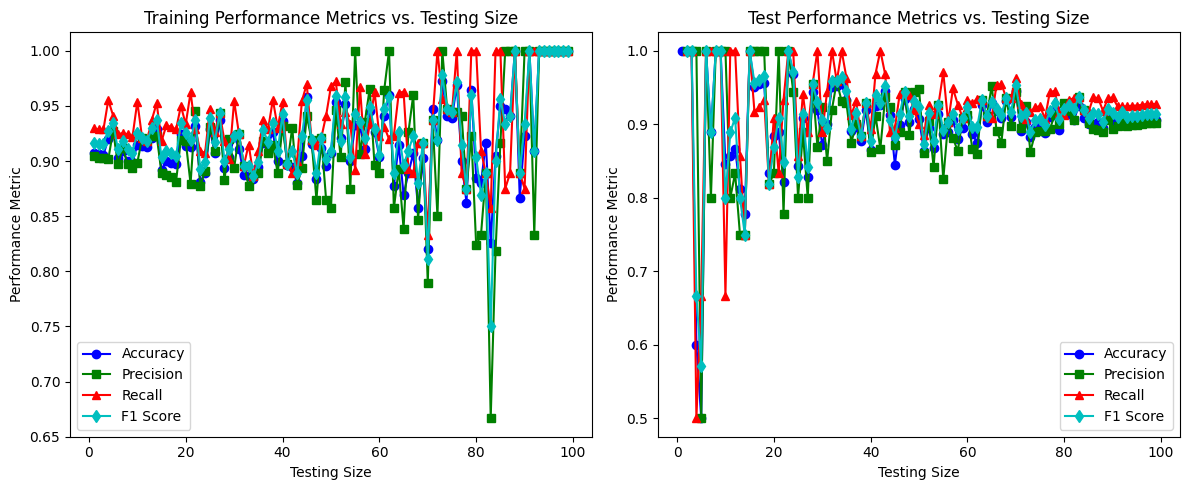

In [18]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)


training_sizes = []

accuracy_train_performance = []
accuracy_test_performance = []

precision_train_performance = []
precision_test_performance = []

recall_train_performance = []
recall_test_performance = []

F1_train_performance = []
F1_test_performance = []


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA) # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Instantiate the Logistic Regression model with appropriate hyperparameters
model = LogisticRegression1(verbose=True)

model.fit(x, y)

for i in range(1, 100):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(0.01*i))

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  training_sizes.append(i)

  #accuracy
  accuracy_train = accuracy(y_train, y_train_pred)
  accuracy_test = accuracy(y_test, y_test_pred)
  accuracy_train_performance.append(accuracy_train)
  accuracy_test_performance.append(accuracy_test)

  #precision
  precision_train = precision(y_train, y_train_pred)
  precision_test = precision(y_test, y_test_pred)
  precision_train_performance.append(precision_train)
  precision_test_performance.append(precision_test)

  #recall
  recall_train =  recall(y_train,y_train_pred)
  recall_test = recall(y_test,y_test_pred)
  recall_train_performance.append(recall_train)
  recall_test_performance.append(recall_test)

  #F1 score
  f1_train = f1_score(y_train,y_train_pred)
  f1_test = f1_score(y_test,y_test_pred)
  F1_train_performance.append(f1_train)
  F1_test_performance.append(f1_test)



# Create two separate figures for training and test performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training Performance
ax1.plot(training_sizes, accuracy_train_performance, label='Accuracy', marker='o', color='b')
ax1.plot(training_sizes, precision_train_performance, label='Precision', marker='s', color='g')
ax1.plot(training_sizes, recall_train_performance, label='Recall', marker='^', color='r')
ax1.plot(training_sizes, F1_train_performance, label='F1 Score', marker='d', color='c')

ax1.set_xlabel('Testing Size')
ax1.set_ylabel('Performance Metric')
ax1.set_title('Training Performance Metrics vs. Testing Size')
ax1.legend()

# Test Performance
ax2.plot(training_sizes, accuracy_test_performance, label='Accuracy', marker='o', color='b')
ax2.plot(training_sizes, precision_test_performance, label='Precision', marker='s', color='g')
ax2.plot(training_sizes, recall_test_performance, label='Recall', marker='^', color='r')
ax2.plot(training_sizes, F1_test_performance, label='F1 Score', marker='d', color='c')

ax2.set_xlabel('Testing Size')
ax2.set_ylabel('Performance Metric')
ax2.set_title('Test Performance Metrics vs. Testing Size')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()


>**Multi-class Implementation**

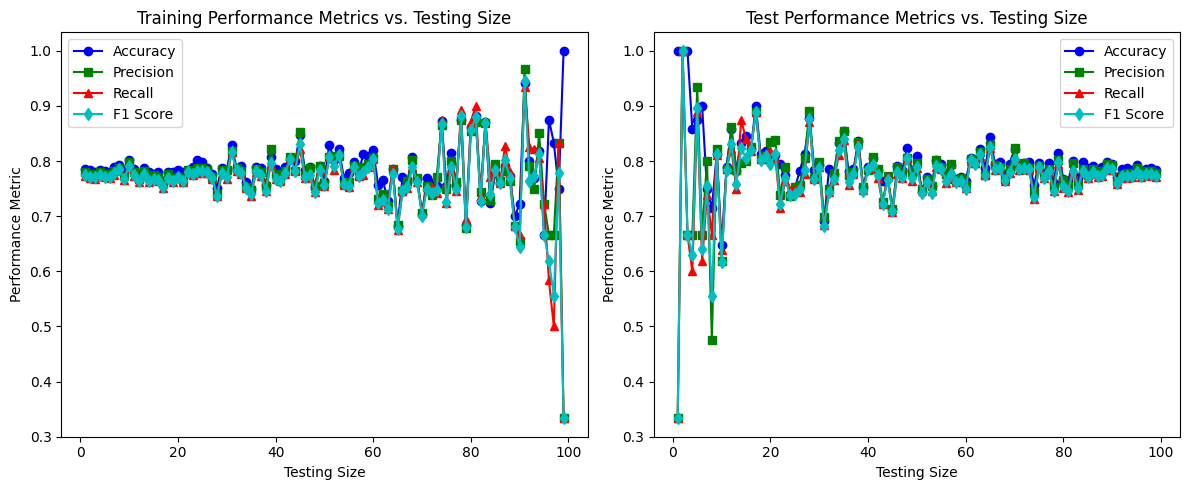

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7) # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7) # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)


training_sizes = []

accuracy_train_performance = []
accuracy_test_performance = []

precision_train_performance = []
precision_test_performance = []

recall_train_performance = []
recall_test_performance = []

F1_train_performance = []
F1_test_performance = []


# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select two features and the target
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term
X = np.c_[np.ones(X.shape[0]), X]

# Instantiate the Logistic Regression model with appropriate hyperparameters
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

# Fit the model to the data
model.fit(X, y)


for i in range(1, 100):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=(0.01*i))

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  training_sizes.append(i)

  #accuracy
  accuracy_train = accuracy(y_train, y_train_pred)
  accuracy_test = accuracy(y_test, y_test_pred)
  accuracy_train_performance.append(accuracy_train)
  accuracy_test_performance.append(accuracy_test)

  #precision
  precision_train = overall_precision(y_train, y_train_pred)
  precision_test = overall_precision(y_test, y_test_pred)
  precision_train_performance.append(precision_train)
  precision_test_performance.append(precision_test)

  #recall
  recall_train =  overall_recall(y_train,y_train_pred)
  recall_test = overall_recall(y_test,y_test_pred)
  recall_train_performance.append(recall_train)
  recall_test_performance.append(recall_test)

  #F1 score
  f1_train = overall_f1(y_train,y_train_pred)
  f1_test = overall_f1(y_test,y_test_pred)
  F1_train_performance.append(f1_train)
  F1_test_performance.append(f1_test)

# Create two separate figures for training and test performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training Performance
ax1.plot(training_sizes, accuracy_train_performance, label='Accuracy', marker='o', color='b')
ax1.plot(training_sizes, precision_train_performance, label='Precision', marker='s', color='g')
ax1.plot(training_sizes, recall_train_performance, label='Recall', marker='^', color='r')
ax1.plot(training_sizes, F1_train_performance, label='F1 Score', marker='d', color='c')

ax1.set_xlabel('Testing Size')
ax1.set_ylabel('Performance Metric')
ax1.set_title('Training Performance Metrics vs. Testing Size')
ax1.legend()

# Test Performance
ax2.plot(training_sizes, accuracy_test_performance, label='Accuracy', marker='o', color='b')
ax2.plot(training_sizes, precision_test_performance, label='Precision', marker='s', color='g')
ax2.plot(training_sizes, recall_test_performance, label='Recall', marker='^', color='r')
ax2.plot(training_sizes, F1_test_performance, label='F1 Score', marker='d', color='c')

ax2.set_xlabel('Testing Size')
ax2.set_ylabel('Performance Metric')
ax2.set_title('Test Performance Metrics vs. Testing Size')
ax2.legend()


# Show the plots
plt.tight_layout()
plt.show()


#**Task 3.4 Growing Minibatch Sizes**

>**Binary-class Implementation**

terminated after 100000 iterations, with norm of the gradient equal to 0.0010424213318176892
the weight found: [-3.88359031 50.76261016]
terminated after 100011 iterations, with norm of the gradient equal to 0.006881081433979426
the weight found: [-4.78754791 64.89358208]
terminated after 100008 iterations, with norm of the gradient equal to 1.2740030609408572
the weight found: [-4.81315634 60.87119806]
terminated after 100002 iterations, with norm of the gradient equal to 2.8860574153420027
the weight found: [-4.30686388 60.26618475]
terminated after 100002 iterations, with norm of the gradient equal to 4.24289973679332
the weight found: [-5.23491202 62.45641661]
terminated after 100000 iterations, with norm of the gradient equal to 0.010167288458525537
the weight found: [-5.13007788 66.474121  ]

Fully-batched Baseline Metrics:
Accuracy: 0.91
Precision: 0.90
Recall: 0.93
F1-score: 0.92



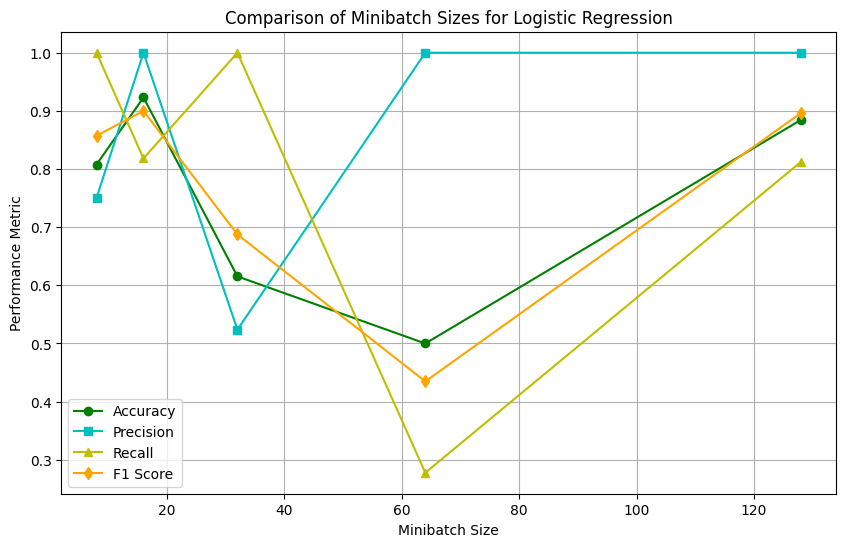

In [21]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Fully batched baseline
model_baseline = LogisticRegressionMiniBatch1(batch_size = len(y), verbose=True)
model_baseline.fit(x, y)

y_pred_baseline = model_baseline.predict(x)

accuracy_baseline = accuracy(y, y_pred_baseline)
precision_baseline = precision(y, y_pred_baseline)
recall_baseline = recall(y, y_pred_baseline)
F1_baseline = f1_score(y, y_pred_baseline)

# Define the performance metric
minibatch_results_accuracy = {}
full_batch_result_accuracy = None

minibatch_results_precision = {}
full_batch_result_precision = None

minibatch_results_recall = {}
full_batch_result_recall = None

minibatch_results_f1 = {}
full_batch_result_f1 = None

# Define minibatch sizes to experiment with
minibatch_sizes = [8, 16, 32, 64, 128]


# Experiment with different minibatch sizes
accuracy_results = []

for minibatch_size in minibatch_sizes:
  # Instantiate and fit the Logistic Regression model using mini-batch SGD
  model = LogisticRegressionMiniBatch1(batch_size = minibatch_size, verbose=True)
  model.fit(x, y)

  # splitting data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Calculate Accuracy
  accuracy_train = accuracy(y_train, y_train_pred)
  accuracy_test = accuracy(y_test, y_test_pred)
  minibatch_results_accuracy[minibatch_size] = accuracy_test

  # Calculate Precision
  precision_train = precision(y_train, y_train_pred)
  precision_test = precision(y_test, y_test_pred)
  minibatch_results_precision[minibatch_size] = precision_test

  # Calculate Recall
  recall_train = recall(y_train, y_train_pred)
  recall_test = recall(y_test, y_test_pred)
  minibatch_results_recall[minibatch_size] = recall_test

  # Calculate F1-score
  f1_train = f1_score(y_train, y_train_pred)
  f1_test = f1_score(y_test, y_test_pred)
  minibatch_results_f1[minibatch_size] = f1_test


# Display the fully-batched base line metrics
print()
print("Fully-batched Baseline Metrics:")
print(f"Accuracy: {accuracy_baseline:.2f}")
print(f"Precision: {precision_baseline:.2f}")
print(f"Recall: {recall_baseline:.2f}")
print(f"F1-score: {F1_baseline:.2f}")
print()


# Create a single figure for all metrics with different colors
plt.figure(figsize=(10, 6))

# Baseline lines with adjusted y-value
baseline_accuracy = [full_batch_result_accuracy] * len(minibatch_sizes)
baseline_precision = [full_batch_result_precision] * len(minibatch_sizes)
baseline_recall = [full_batch_result_recall] * len(minibatch_sizes)
baseline_f1 = [full_batch_result_f1] * len(minibatch_sizes)

# Accuracy
plt.plot(list(minibatch_results_accuracy.keys()), list(minibatch_results_accuracy.values()), marker='o', label='Accuracy', color='g')

# Precision
plt.plot(list(minibatch_results_precision.keys()), list(minibatch_results_precision.values()), marker='s', label='Precision', color='c')

# Recall
plt.plot(list(minibatch_results_recall.keys()), list(minibatch_results_recall.values()), marker='^', label='Recall', color='y')

# F1 Score
plt.plot(list(minibatch_results_f1.keys()), list(minibatch_results_f1.values()), marker='d', label='F1 Score', color='orange')

plt.xlabel('Minibatch Size')
plt.ylabel('Performance Metric')
plt.title('Comparison of Minibatch Sizes for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


### comparing the plots and the base line values, batch size of 128 has the best performance

**Compute Speed Convergence for Binary Class**

terminated after 100000 iterations, with norm of the gradient equal to 0.0010424213318176835
the weight found: [-3.88359031 50.76261016]
terminated after 100011 iterations, with norm of the gradient equal to 1.708347834189755
the weight found: [-5.07668313 64.99667057]
terminated after 100008 iterations, with norm of the gradient equal to 0.9498219797756758
the weight found: [-4.64186724 60.72910173]
terminated after 100000 iterations, with norm of the gradient equal to 1.7032178998212189
the weight found: [-4.77806536 60.3630472 ]
terminated after 100001 iterations, with norm of the gradient equal to 0.30076484753337496
the weight found: [-4.73618487 62.47251723]
terminated after 100000 iterations, with norm of the gradient equal to 0.0039011775379697447
the weight found: [-5.08343873 66.46832802]


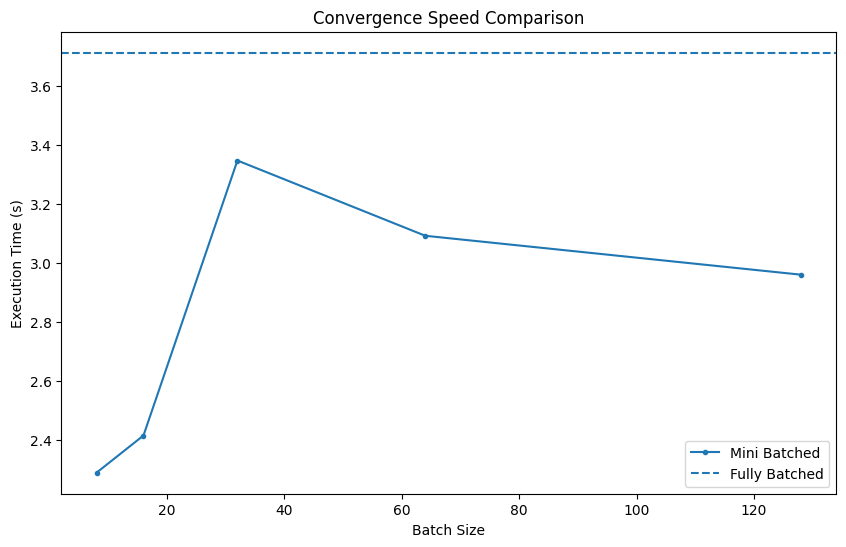

In [22]:
import time
minibatch_results = {}

# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (e.g., 1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Fully batched baseline
model_baseline = LogisticRegressionMiniBatch1(batch_size = len(y), verbose=True)
start = time.time()
model_baseline.fit(x, y)
end = time.time()
full_batch_speed = end-start

# Define minibatch sizes to experiment with
minibatch_sizes = [8, 16, 32, 64, 128]

speed_list = []

for minibatch_size in minibatch_sizes:
  # Instantiate and fit the Logistic Regression model using mini-batch SGD
  model = LogisticRegressionMiniBatch1(batch_size = minibatch_size, verbose=True)
  start = time.time()
  model.fit(x, y)
  end = time.time()

  speed_list.append(end-start)

#plot: speed
plt.figure(figsize=(10, 6))
plt.plot(minibatch_sizes, speed_list, marker='.', label='Mini Batched')
plt.axhline(y=full_batch_speed, linestyle='--', label='Fully Batched')
plt.xlabel('Batch Size')
plt.ylabel('Execution Time (s)')
plt.title('Convergence Speed Comparison')
plt.legend()
plt.show()


>**Multi-class Implementation**

Fully-batched Baseline Metrics:
Accuracy: 0.79
Precision: 0.79
Recall: 0.78
F1-score: 0.78



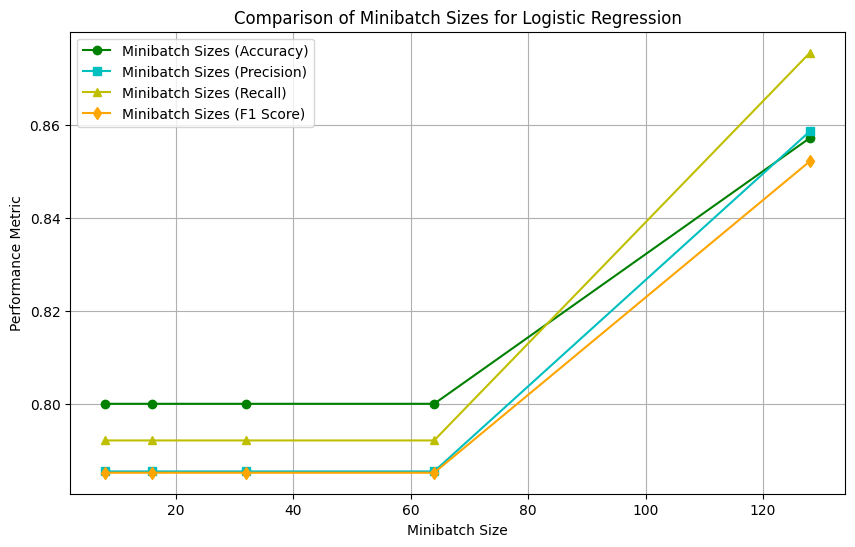

In [23]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7)  # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select two features and the target
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term
X = np.c_[np.ones(X.shape[0]), X]


# Define the performance metric
minibatch_results_accuracy = {}
full_batch_result_accuracy = None

minibatch_results_precision = {}
full_batch_result_precision = None

minibatch_results_recall = {}
full_batch_result_recall = None

minibatch_results_f1 = {}
full_batch_result_f1 = None

# Define minibatch sizes to experiment with
minibatch_sizes = [8, 16, 32, 64, 128]

# Fully batched baseline
# model_baseline = LogisticRegression(learning_rate=0.01, num_iterations=10000)
model_baseline = LogisticRegressionMiniBatch(learning_rate=0.01, max_iters=1000, batch_size=len(y), random_state=42)
model_baseline.fit(X, y)
y_pred_baseline = model_baseline.predict(X)

accuracy_baseline = accuracy(y, y_pred_baseline)
precision_baseline = overall_precision(y, y_pred_baseline)
recall_baseline = overall_recall(y, y_pred_baseline)
F1_baseline = overall_f1(y, y_pred_baseline)

# Experiment with different minibatch sizes
accuracy_results = []

for minibatch_size in minibatch_sizes:
  # Instantiate and fit the Logistic Regression model using mini-batch SGD
  model = LogisticRegressionMiniBatch(learning_rate=0.01, max_iters=1000, batch_size=minibatch_size, random_state=42)
  model.fit(X, y)

  # splitting data
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Make predictions
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Calculate Accuracy
  accuracy_train = accuracy(y_train, y_train_pred)
  accuracy_test = accuracy(y_test, y_test_pred)
  minibatch_results_accuracy[minibatch_size] = accuracy_test

  # Calculate Precision
  precision_train = overall_precision(y_train, y_train_pred)
  precision_test = overall_precision(y_test, y_test_pred)
  minibatch_results_precision[minibatch_size] = precision_test

  # Calculate Recall
  recall_train = overall_recall(y_train, y_train_pred)
  recall_test = overall_recall(y_test, y_test_pred)
  minibatch_results_recall[minibatch_size] = recall_test

  # Calculate F1-score
  f1_train = overall_f1(y_train, y_train_pred)
  f1_test = overall_f1(y_test, y_test_pred)
  minibatch_results_f1[minibatch_size] = f1_test


# Display the fully-batched base line metrics
print("Fully-batched Baseline Metrics:")
print(f"Accuracy: {accuracy_baseline:.2f}")
print(f"Precision: {precision_baseline:.2f}")
print(f"Recall: {recall_baseline:.2f}")
print(f"F1-score: {F1_baseline:.2f}")
print()


# Create a single figure for all metrics with different colors
plt.figure(figsize=(10, 6))

# Baseline lines with adjusted y-value
baseline_accuracy = [full_batch_result_accuracy] * len(minibatch_sizes)
baseline_precision = [full_batch_result_precision] * len(minibatch_sizes)
baseline_recall = [full_batch_result_recall] * len(minibatch_sizes)
baseline_f1 = [full_batch_result_f1] * len(minibatch_sizes)

# Accuracy
plt.plot(list(minibatch_results_accuracy.keys()), list(minibatch_results_accuracy.values()), marker='o', label='Minibatch Sizes (Accuracy)', color='g')

# Precision
plt.plot(list(minibatch_results_precision.keys()), list(minibatch_results_precision.values()), marker='s', label='Minibatch Sizes (Precision)', color='c')

# Recall
plt.plot(list(minibatch_results_recall.keys()), list(minibatch_results_recall.values()), marker='^', label='Minibatch Sizes (Recall)', color='y')

# F1 Score
plt.plot(list(minibatch_results_f1.keys()), list(minibatch_results_f1.values()), marker='d', label='Minibatch Sizes (F1 Score)', color='orange')

plt.xlabel('Minibatch Size')
plt.ylabel('Performance Metric')
plt.title('Comparison of Minibatch Sizes for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


### comparing the plots and the base line values, batch size of 128 has the best performance

**Compute Speed Convergence for Multi-Class**

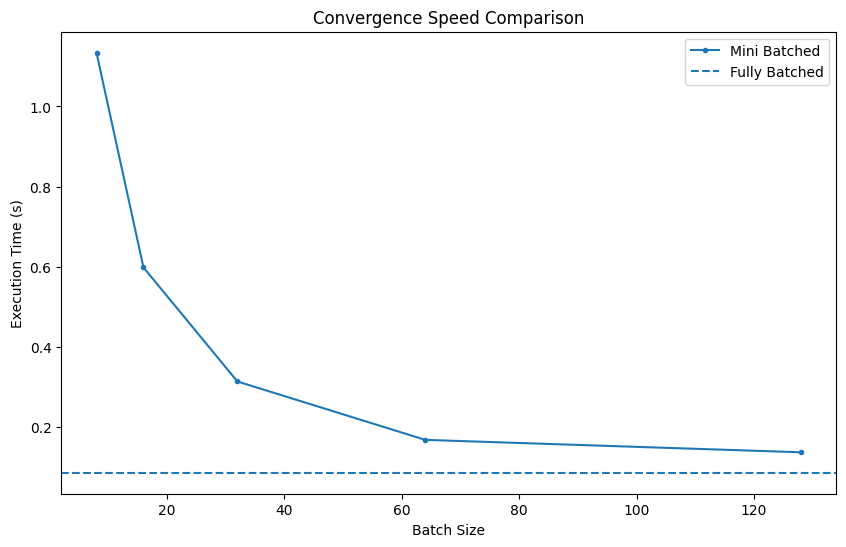

In [25]:
import time
minibatch_results = {}

# Fully batched baseline
model_baseline = LogisticRegressionMiniBatch(learning_rate=0.01, max_iters=1000, batch_size=len(y), random_state=42)
start = time.time()
model_baseline.fit(X, y)
end = time.time()
full_batch_speed = end-start

# Define minibatch sizes to experiment with
minibatch_sizes = [8, 16, 32, 64, 128]

speed_list = []

for minibatch_size in minibatch_sizes:
  # Instantiate and fit the Logistic Regression model using mini-batch SGD
  model = LogisticRegressionMiniBatch(learning_rate=0.01, max_iters=1000, batch_size=minibatch_size, random_state=42)
  start = time.time()
  model.fit(X, y)
  end = time.time()

  speed_list.append(end-start)

#plot: speed
plt.figure(figsize=(10, 6))
plt.plot(minibatch_sizes, speed_list, marker='.', label='Mini Batched')
plt.axhline(y=full_batch_speed, linestyle='--', label='Fully Batched')
plt.xlabel('Batch Size')
plt.ylabel('Execution Time (s)')
plt.title('Convergence Speed Comparison')
plt.legend()
plt.show()


# **Task 3.5 Varying Learning Rate**

> **Binary Class Implementation**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"Testing with learning rate: {lr}")
    model = LogisticRegressionMiniBatch1(learning_rate=lr, verbose=True)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy(y_train, y_train_pred)
    test_accuracy = accuracy(y_test, y_test_pred)

    train_precision = precision(y_train, y_train_pred)
    test_precision = precision(y_test, y_test_pred)

    train_recall = recall(y_train, y_train_pred)
    test_recall = recall(y_test, y_test_pred)

    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test, y_test_pred)

    print()
    print("Training Set Metrics:")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Training F1 Score: {train_f1_score:.2f}")

    print()
    print("Test Set Metrics:")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    print(f"Testing Precision: {test_precision:.2f}")
    print(f"Testing Recall: {test_recall:.2f}")
    print(f"Testing F1 Score: {test_f1_score:.2f}")
    print("-"*50)


Testing with learning rate: 0.001
terminated after 100000 iterations, with norm of the gradient equal to 2.126363653611857
the weight found: [-0.20571018  2.75049505]

Training Set Metrics:
Training Accuracy: 0.88
Training Precision: 0.83
Training Recall: 0.98
Training F1 Score: 0.90

Test Set Metrics:
Testing Accuracy: 0.81
Testing Precision: 0.81
Testing Recall: 0.87
Testing F1 Score: 0.84
--------------------------------------------------
Testing with learning rate: 0.01
terminated after 100000 iterations, with norm of the gradient equal to 0.8279162502388764
the weight found: [-1.41012884 18.26742314]

Training Set Metrics:
Training Accuracy: 0.93
Training Precision: 0.96
Training Recall: 0.91
Training F1 Score: 0.94

Test Set Metrics:
Testing Accuracy: 0.85
Testing Precision: 1.00
Testing Recall: 0.73
Testing F1 Score: 0.85
--------------------------------------------------
Testing with learning rate: 0.1
terminated after 100000 iterations, with norm of the gradient equal to 0.277

> **Multi-Class Implementation**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7)  # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)



# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # Convert all malformed data to NA
wine_data = wine_data.dropna()  # Remove all NA data

# Select two features and the target (Class)
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features (feature scaling)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Instantiate the Logistic Regression model with appropriate hyperparameters
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"\nTesting with learning rate: {lr}")

    # Initialize and fit the logistic regression model on the training data
    model = LogisticRegression(learning_rate=lr, num_iterations=10000)
    model.fit(X_train, y_train)

    # Predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics for the training set
    train_accuracy = accuracy(y_train, y_train_pred)
    train_precision = overall_precision(y_train, y_train_pred)
    train_recall = overall_recall(y_train, y_train_pred)
    train_f1_score = overall_f1(y_train, y_train_pred)

    # Compute metrics for the testing set
    test_accuracy = accuracy(y_test, y_test_pred)
    test_precision = overall_precision(y_test, y_test_pred)
    test_recall = overall_recall(y_test, y_test_pred)
    test_f1_score = overall_f1(y_test, y_test_pred)

    # Print metrics for the training set
    print()
    print("Training Set Metrics:")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Training F1 Score: {train_f1_score:.2f}")

    # Print metrics for the testing set
    print()
    print("Test Set Metrics:")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    print(f"Testing Precision: {test_precision:.2f}")
    print(f"Testing Recall: {test_recall:.2f}")
    print(f"Testing F1 Score: {test_f1_score:.2f}")
    print("-"*50)



Testing with learning rate: 0.001

Training Set Metrics:
Training Accuracy: 0.81
Training Precision: 0.80
Training Recall: 0.80
Training F1 Score: 0.80

Test Set Metrics:
Testing Accuracy: 0.80
Testing Precision: 0.79
Testing Recall: 0.81
Testing F1 Score: 0.80
--------------------------------------------------

Testing with learning rate: 0.01

Training Set Metrics:
Training Accuracy: 0.81
Training Precision: 0.80
Training Recall: 0.80
Training F1 Score: 0.80

Test Set Metrics:
Testing Accuracy: 0.80
Testing Precision: 0.79
Testing Recall: 0.81
Testing F1 Score: 0.80
--------------------------------------------------

Testing with learning rate: 0.1

Training Set Metrics:
Training Accuracy: 0.81
Training Precision: 0.80
Training Recall: 0.80
Training F1 Score: 0.80

Test Set Metrics:
Testing Accuracy: 0.80
Testing Precision: 0.79
Testing Recall: 0.81
Testing F1 Score: 0.80
--------------------------------------------------


# **Task 3.6 Choosing Optimal Set Of Parameters**

> **Best set of Parameters for binary classification based on F-score**

In [29]:
import numpy as np
import pandas as pd

def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Filter only two classes (e.g., 1 and 2) and adjust to binary (0 and 1)
wine_data = wine_data[wine_data["Class"].isin([1, 2])]
wine_data["Class"] = wine_data["Class"] - 1

# Data definition using only the 'Alcohol' feature
x = wine_data["Alcohol"].values
y = wine_data["Class"].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



# Best hyperparameters
best_params = {
    'add_bias': True,
    'learning_rate': 0.01,
    'epsilon': 0.001,
    'max_iters': 100000.0,
    'batch_size': 32
}

print(f"Testing with parameters: {best_params}")
model = LogisticRegressionMiniBatch1(
    add_bias=best_params['add_bias'],
    learning_rate=best_params['learning_rate'],
    epsilon=best_params['epsilon'],
    max_iters=int(best_params['max_iters']),
    batch_size=int(best_params['batch_size']),
    verbose=True
)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_accuracy = accuracy(y_train, y_train_pred)
test_accuracy = accuracy(y_test, y_test_pred)

train_precision = precision(y_train, y_train_pred)
test_precision = precision(y_test, y_test_pred)

train_recall = recall(y_train, y_train_pred)
test_recall = recall(y_test, y_test_pred)

train_f1_score = f1_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_test_pred)

print()
print("Training Set Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1_score:.2f}")

print()
print("Test Set Metrics:")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Testing F1 Score: {test_f1_score:.2f}")


Testing with parameters: {'add_bias': True, 'learning_rate': 0.01, 'epsilon': 0.001, 'max_iters': 100000.0, 'batch_size': 32}
terminated after 100000 iterations, with norm of the gradient equal to 0.20736460915224728
the weight found: [-1.34712601 17.62682808]

Training Set Metrics:
Training Accuracy: 0.90
Training Precision: 0.89
Training Recall: 0.95
Training F1 Score: 0.92

Test Set Metrics:
Testing Accuracy: 0.92
Testing Precision: 1.00
Testing Recall: 0.86
Testing F1 Score: 0.92


> **Best set of Parameters for multi-class classification based on Accuracy**

In [31]:
# Define functions to calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    predicted_positives = np.sum(y_pred == target_class)
    return true_positives / (predicted_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_precision(y_true, y_pred):
    class_precision = [precision(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_precision)

def recall(y_true, y_pred, target_class):
    true_positives = np.sum((y_true == target_class) & (y_pred == target_class))
    actual_positives = np.sum(y_true == target_class)
    return true_positives / (actual_positives + 1e-7)  # Add a small constant to avoid division by zero

def overall_recall(y_true, y_pred):
    class_recall = [recall(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_recall)

def f1_score(y_true, y_pred, target_class):
    precision_value = precision(y_true, y_pred, target_class)
    recall_value = recall(y_true, y_pred, target_class)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-7)  # Add a small constant to avoid division by zero

def overall_f1(y_true, y_pred):
    class_f1 = [f1_score(y_true, y_pred, target_class) for target_class in range(1, 4)]
    return np.mean(class_f1)


# Download dataset 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]
# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
wine_data = wine_data.replace('?', pd.NA)  # convert all malformed datas to NA
wine_data = wine_data.dropna()  # remove all NA datas

# Select two features and the target (Class)
features = ["Alcohol", "Malic Acid"]
X = wine_data[features].values
y = wine_data["Class"].values

# Normalize the features (feature scaling)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Updated best hyperparameters
best_params = {
    'learning_rate': 0.1,
    'num_iterations' : 8000
}

print(f"Testing with parameters: {best_params}")

# Instantiate the Logistic Regression model with the best found hyperparameters
model = LogisticRegression(learning_rate=best_params['learning_rate'], num_iterations=best_params['num_iterations'])

# Fit the model to the data
model.fit(X_train,y_train)

# Predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute metrics for the training set
train_accuracy = accuracy(y_train, y_train_pred)
train_precision = overall_precision(y_train, y_train_pred)
train_recall = overall_recall(y_train, y_train_pred)
train_f1_score = overall_f1(y_train, y_train_pred)

# Compute metrics for the testing set
test_accuracy = accuracy(y_test, y_test_pred)
test_precision = overall_precision(y_test, y_test_pred)
test_recall = overall_recall(y_test, y_test_pred)
test_f1_score = overall_f1(y_test, y_test_pred)

# Print metrics for the training set
print()
print("Training Set Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1_score:.2f}")

# Print metrics for the testing set
print()
print("Test Set Metrics:")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Testing Precision: {test_precision:.2f}")
print(f"Testing Recall: {test_recall:.2f}")
print(f"Testing F1 Score: {test_f1_score:.2f}")


Testing with parameters: {'learning_rate': 0.1, 'num_iterations': 8000}

Training Set Metrics:
Training Accuracy: 0.80
Training Precision: 0.80
Training Recall: 0.79
Training F1 Score: 0.80

Test Set Metrics:
Testing Accuracy: 0.77
Testing Precision: 0.74
Testing Recall: 0.74
Testing F1 Score: 0.73
